# Exploratory Data Analysis

This notebook provides tools to analyze the distribution of your variables along with correlations that exist among them. The supporting Python code is in EDATools.py. Many of the functions have additional arguments that are defaulted. For more details look through the code. Also add any functions you find useful.

# Outline 

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Part One - Distributional Analysis](#part-one---distributional-analysis)
    - [Load Data and Specify Variables](#load-data-and-specify-variables)
    - [Distribution of Target Variable](#target-variable)
    - [Distribution of Predictor Variables](#predictor-variables)
- [Part Two - Predictor Correlations and Clustering](#part-two---predictor-correlation)
    - [Correlation Between Continuous Variables](#correlation-between-continuous-variables)
    - [Correlation Between Categorical Variables](#correlation-between-categorical-variables)
    - [Correlation Between Continuous and Categorical Variables](#correlation-between-continuous-and-categorical-variables)

<!-- MarkdownTOC -->

<a name="part-one---distributional-analysis"></a>
# Part One - Distributional Analysis

<a name="load-data-and-specify-variables"></a>
## Load Data and Specify Variables

In this section we will load our dataset, print the index of each feature and then specify which variables are predictors, target, controls (optional), and weight (optional). For variables with null values, null_value_cleanup will create an IS_NULL indicator variable. If you prefer another method of dealing with missing values, like imputing values (e.g. mean, median, mode), write a function to do it, put it in EDATools, and call it below. 

In [1]:
import EDATools
import pandas as pd
import numpy as np
import warnings
#import pyodbc as odbc

#cnxn = odbc.connect('DRIVER={SQL SERVER}; SERVER=server name here; Database=database name here; trusted_connection=yes')
#dataset = pd.io.sql.read_sql_query(""" Query here """, cnxn)

dataset = pd.read_csv("C:/Users/dsmit/ModelTools/IBMHR_Classification/WA_Fn-UseC_-HR-Employee-Attrition.csv") 

EDATools.null_value_cleanup(dataset)

# Print the index of each feature.
for i, col in enumerate(dataset.columns):
    print(i, col)

0 Age
1 Attrition
2 BusinessTravel
3 DailyRate
4 Department
5 DistanceFromHome
6 Education
7 EducationField
8 EmployeeCount
9 EmployeeNumber
10 EnvironmentSatisfaction
11 Gender
12 HourlyRate
13 JobInvolvement
14 JobLevel
15 JobRole
16 JobSatisfaction
17 MaritalStatus
18 MonthlyIncome
19 MonthlyRate
20 NumCompaniesWorked
21 Over18
22 OverTime
23 PercentSalaryHike
24 PerformanceRating
25 RelationshipSatisfaction
26 StandardHours
27 StockOptionLevel
28 TotalWorkingYears
29 TrainingTimesLastYear
30 WorkLifeBalance
31 YearsAtCompany
32 YearsInCurrentRole
33 YearsSinceLastPromotion
34 YearsWithCurrManager


Take a look at the top few rows of the data set.

In [2]:
pd.set_option('display.max_columns', None) # This allows you to display larger data frames

dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


Using the index of each variable above, specify the index/indices of predictors, target, controls, and weight variables. If there are variables that are numeric, but categorical, store their indicies in numeric_cat_index. 

In [3]:
predictors = np.delete(np.arange(35), np.array([1,8,21,26])) 
numeric_cat_index = np.array([6,10,13,14,16,24,25,27,30])
target = 1

<a name="target-variable"></a>
## Distribution of Target

This section will provide information about the target variable distribution. If your target variable is categorical, set p_target_categorical = True and p_pp_plots = False. In this case you'll see a bar chart along with counts for each category.
<br>
If your target is continuous, set p_target_categorical = False and p_pp_plots = True. This option will give summary statistics, and will compare the target distribution to hypothetical distributions. Maximum likelihood estimatation is used to fit the empirical data to a normal, lognormal, gamma, and inverse gaussian distribution. For each distribution, the Kolmogorov-Smirinov (KS) statistic is computed, a pp-plot is given, and the fitted pdf is plotted over the histogram. A good fit is characterized by a low KS statistic, a pp-plot close to the line $y = x$, and the histogram close to the fitted pdf. Many modeling algorithms can take advantage of choosing an appropriate distribution. Add any other distributions you would like to test.


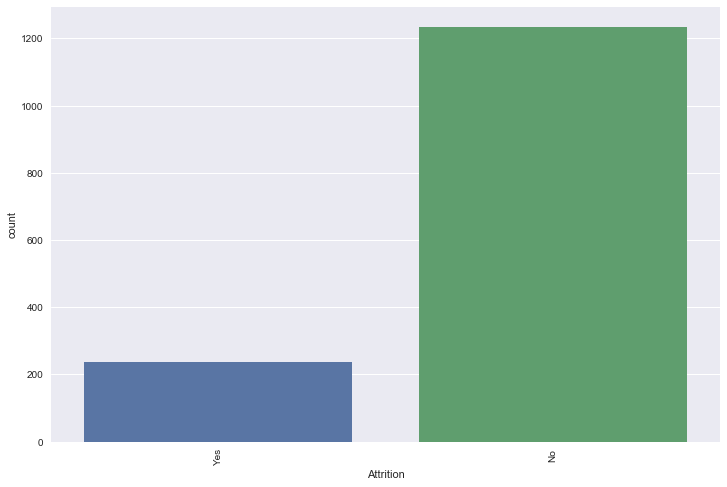

Level                     Weight
No                        1233
Yes                       237


In [4]:
EDATools.TargetDist(dataset, target, p_target_categorical = True, p_pp_plots = False)

<a name="predictor-variables"></a>
## Distribution of Predictors

For each categorical variable, a bar chart and the count/weight for each category is given. For each continuous variable, summary statistics are calculated and the kernel density estimation KDE (a smoothed histogram) is plotted with the histogram. This section helps to understand your predictors and identify potential data issues.

Distributions - Predictors:


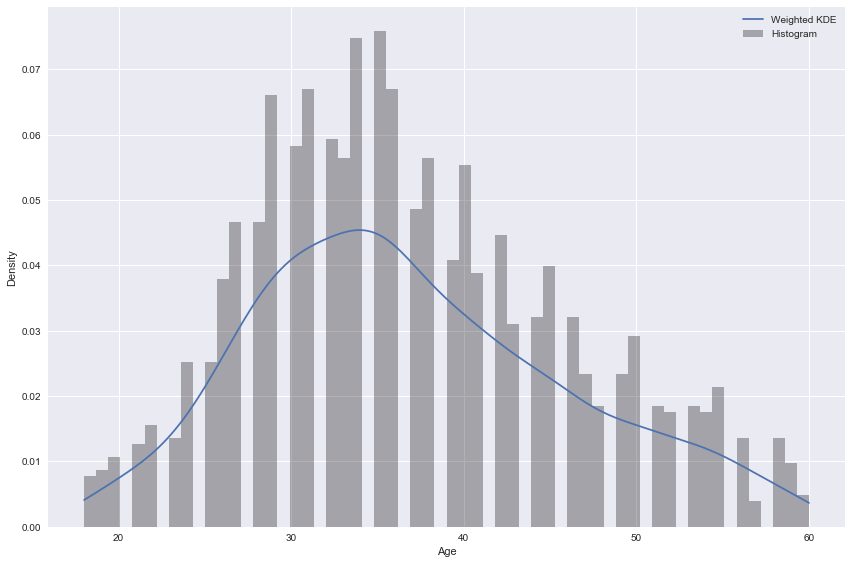

                  Age
Weight    1470.000000
Mean        36.923810
StdDev       9.135373
Min         18.000000
25%         30.000000
50%         36.000000
75%         43.000000
Max         60.000000
Skewness     0.413286
Kurtosis    -0.404145


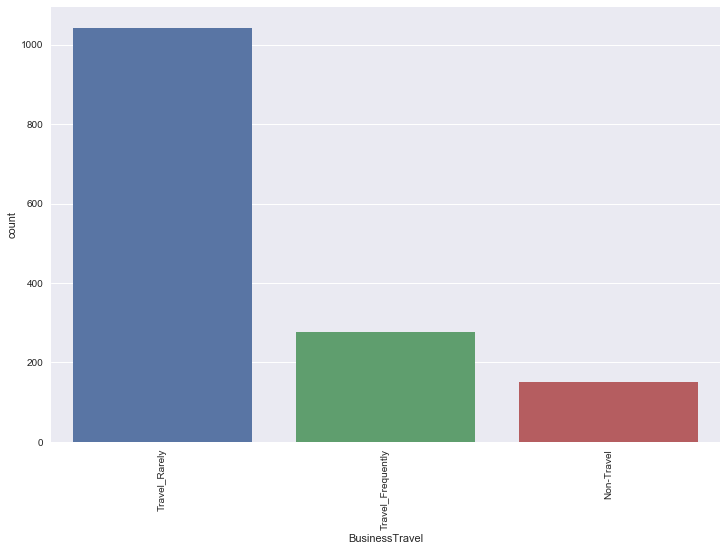

Level                     Weight
Non-Travel                150
Travel_Frequently         277
Travel_Rarely             1043


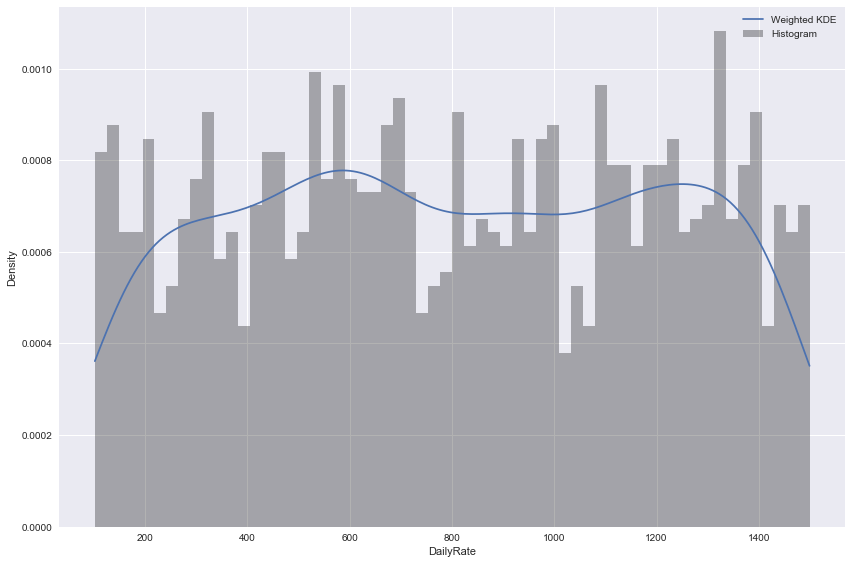

            DailyRate
Weight    1470.000000
Mean       802.485714
StdDev     403.509100
Min        102.000000
25%        465.000000
50%        802.000000
75%       1157.000000
Max       1499.000000
Skewness    -0.003519
Kurtosis    -1.203823


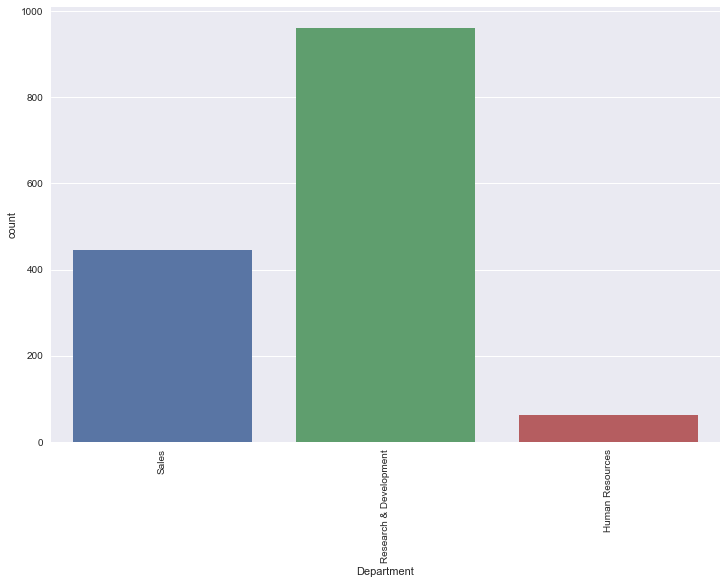

Level                     Weight
Human Resources           63
Research & Development    961
Sales                     446


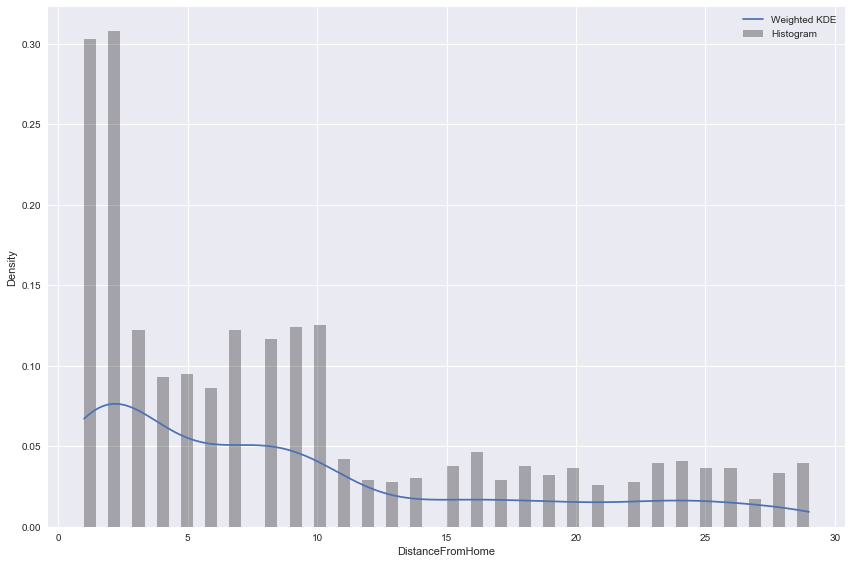

          DistanceFromHome
Weight         1470.000000
Mean              9.192517
StdDev            8.106864
Min               1.000000
25%               2.000000
50%               7.000000
75%              14.000000
Max              29.000000
Skewness          0.958118
Kurtosis         -0.224833


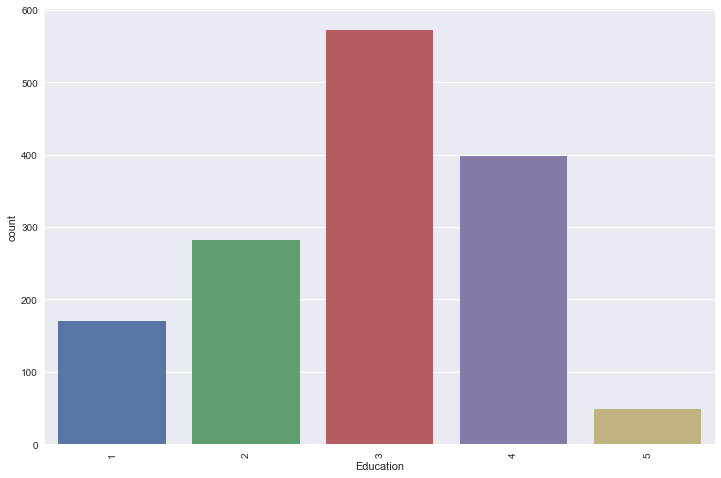

Level                     Weight
1                         170
2                         282
3                         572
4                         398
5                         48


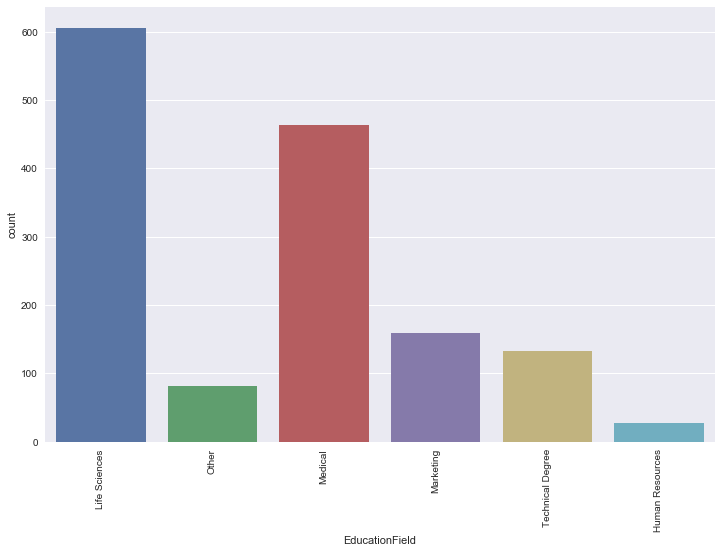

Level                     Weight
Human Resources           27
Life Sciences             606
Marketing                 159
Medical                   464
Other                     82
Technical Degree          132


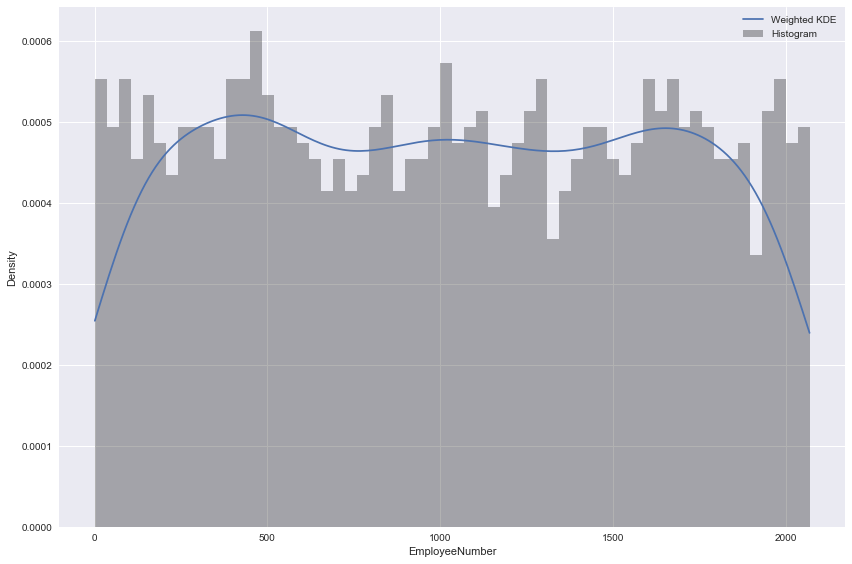

          EmployeeNumber
Weight       1470.000000
Mean         1024.865306
StdDev        602.024335
Min             1.000000
25%           491.250000
50%          1020.500000
75%          1555.750000
Max          2068.000000
Skewness        0.016574
Kurtosis       -1.223179


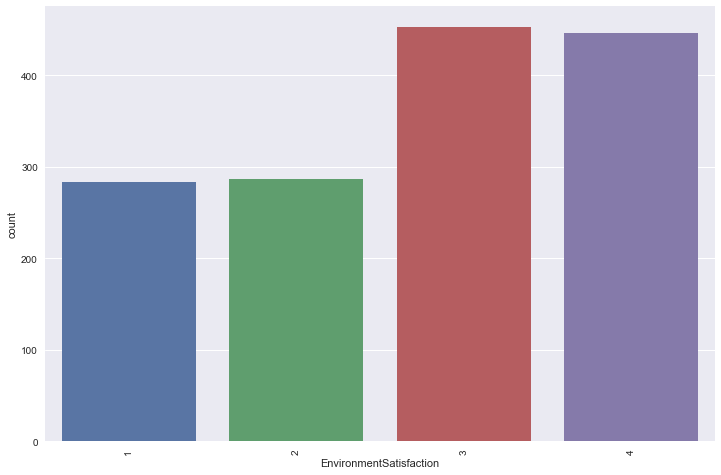

Level                     Weight
1                         284
2                         287
3                         453
4                         446


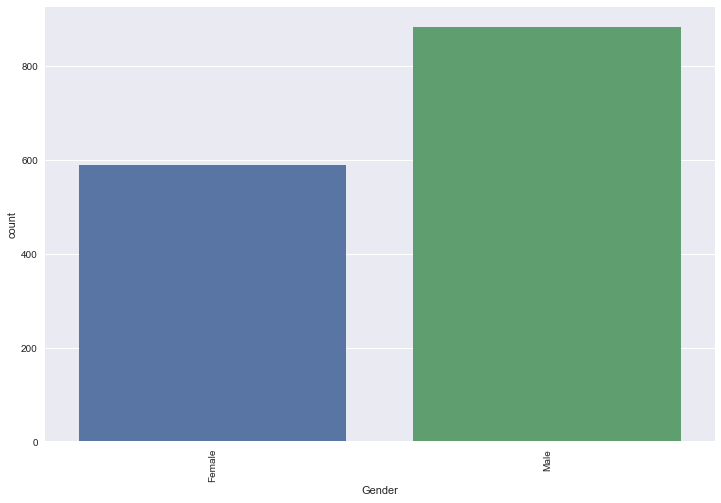

Level                     Weight
Female                    588
Male                      882


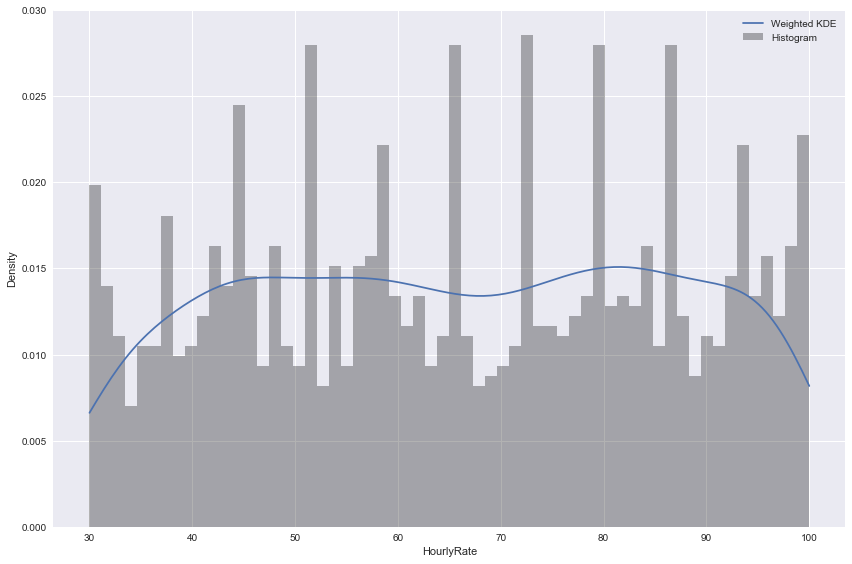

           HourlyRate
Weight    1470.000000
Mean        65.891156
StdDev      20.329428
Min         30.000000
25%         48.000000
50%         66.000000
75%         83.750000
Max        100.000000
Skewness    -0.032311
Kurtosis    -1.196398


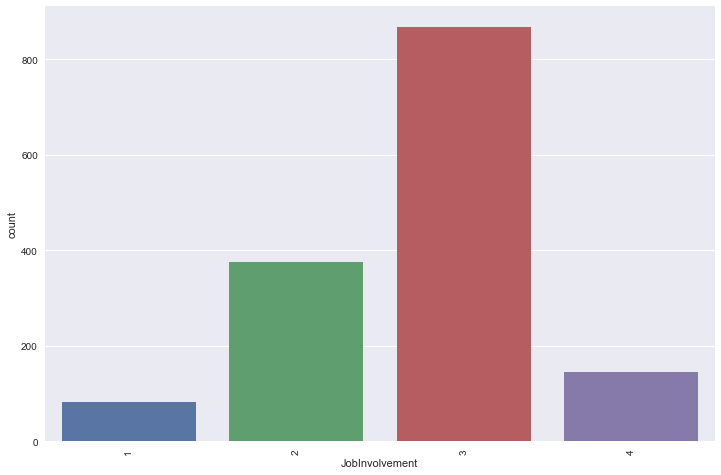

Level                     Weight
1                         83
2                         375
3                         868
4                         144


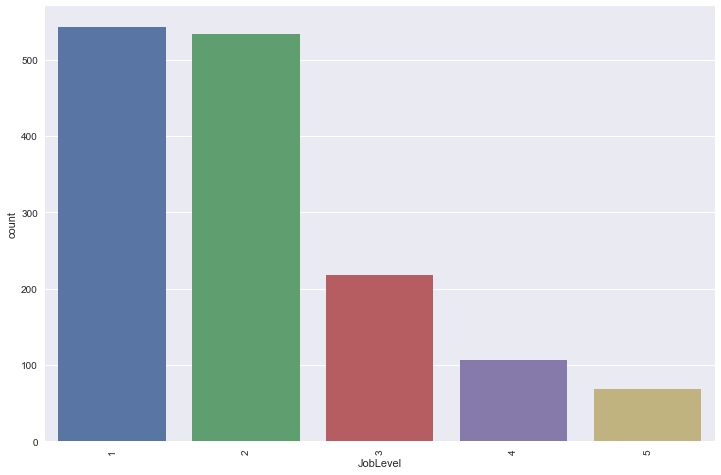

Level                     Weight
1                         543
2                         534
3                         218
4                         106
5                         69


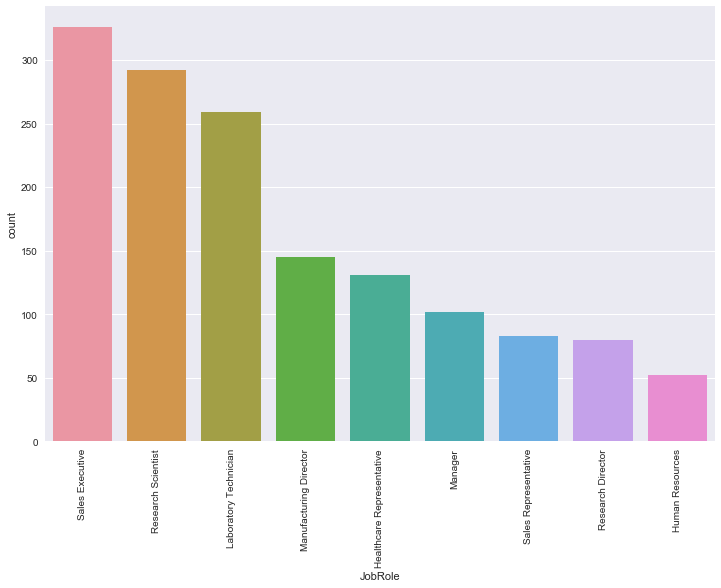

Level                     Weight
Healthcare Representative 131
Human Resources           52
Laboratory Technician     259
Manager                   102
Manufacturing Director    145
Research Director         80
Research Scientist        292
Sales Executive           326
Sales Representative      83


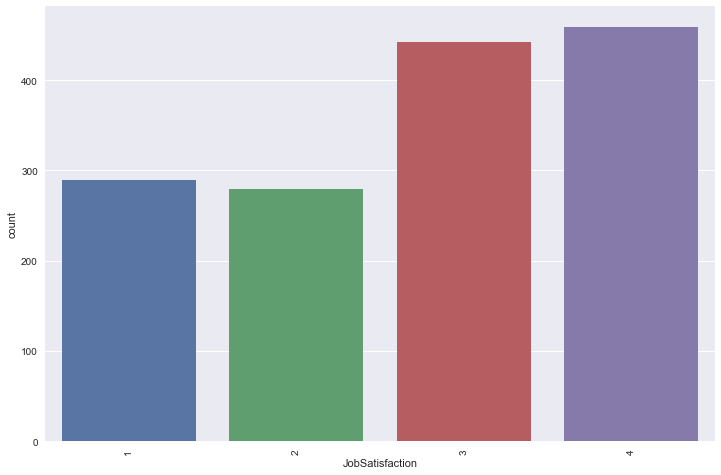

Level                     Weight
1                         289
2                         280
3                         442
4                         459


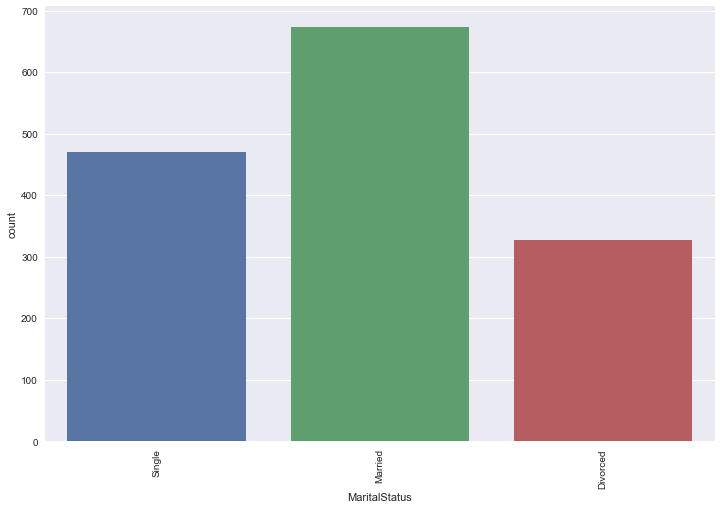

Level                     Weight
Divorced                  327
Married                   673
Single                    470


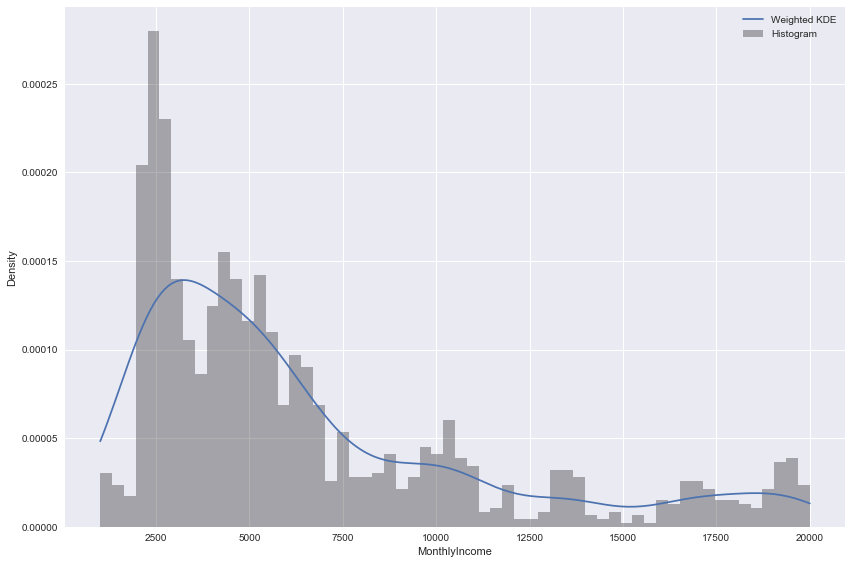

          MonthlyIncome
Weight      1470.000000
Mean        6502.931293
StdDev      4707.956783
Min         1009.000000
25%         2911.000000
50%         4919.000000
75%         8379.000000
Max        19999.000000
Skewness       1.369817
Kurtosis       1.005233


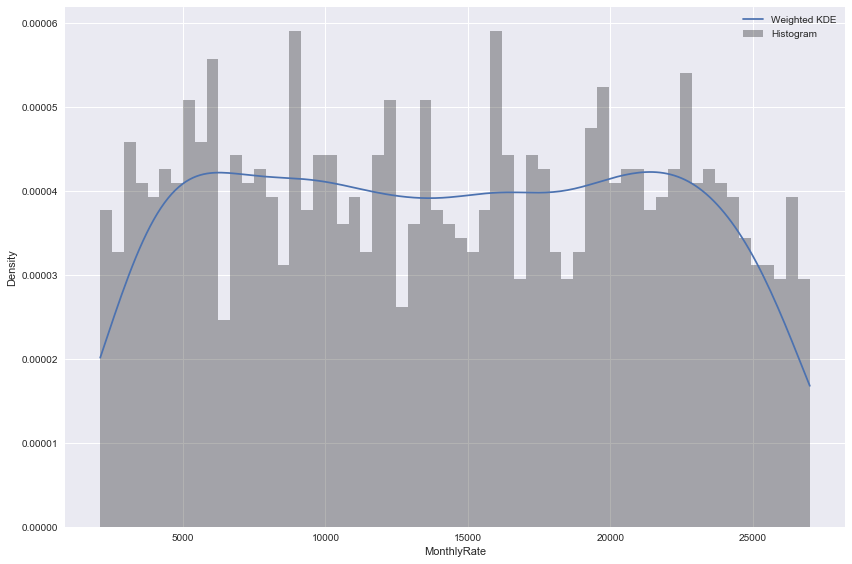

           MonthlyRate
Weight     1470.000000
Mean      14313.103401
StdDev     7117.786044
Min        2094.000000
25%        8047.000000
50%       14235.500000
75%       20461.500000
Max       26999.000000
Skewness      0.018578
Kurtosis     -1.214956


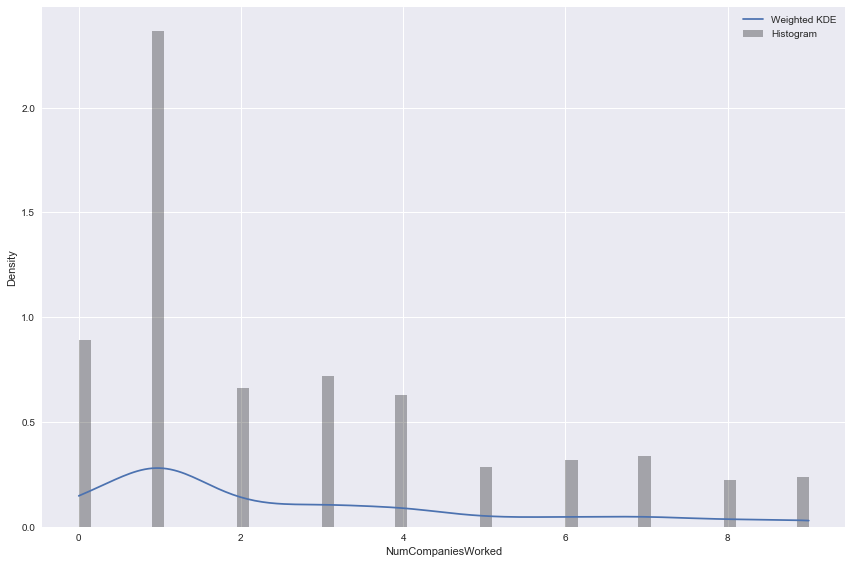

          NumCompaniesWorked
Weight           1470.000000
Mean                2.693197
StdDev              2.498009
Min                 0.000000
25%                 1.000000
50%                 2.000000
75%                 4.000000
Max                 9.000000
Skewness            1.026471
Kurtosis            0.010214


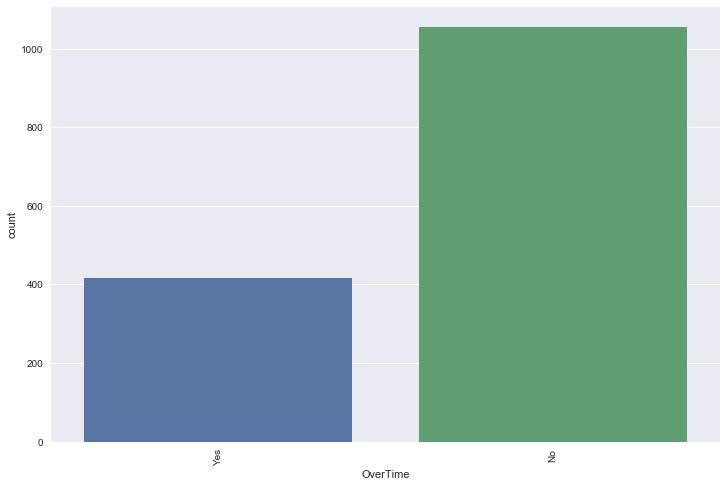

Level                     Weight
No                        1054
Yes                       416


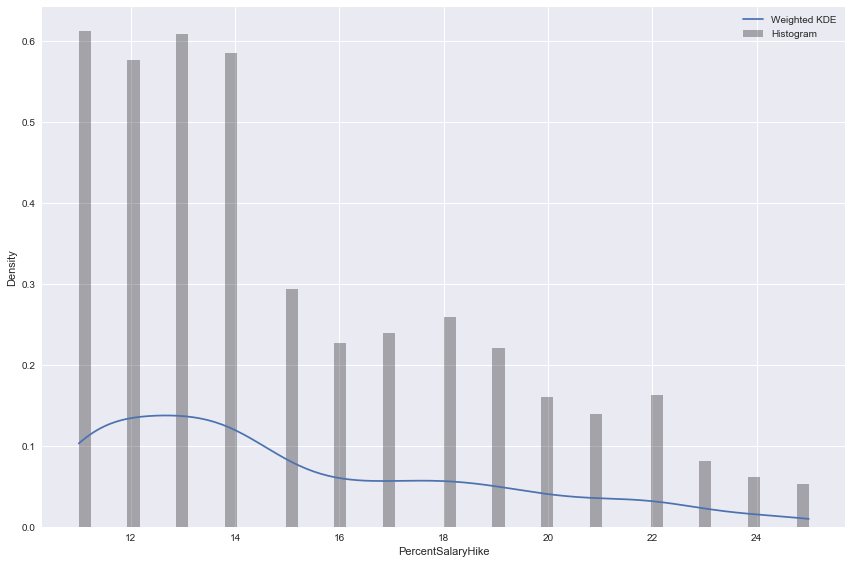

          PercentSalaryHike
Weight          1470.000000
Mean              15.209524
StdDev             3.659938
Min               11.000000
25%               12.000000
50%               14.000000
75%               18.000000
Max               25.000000
Skewness           0.821128
Kurtosis          -0.300598


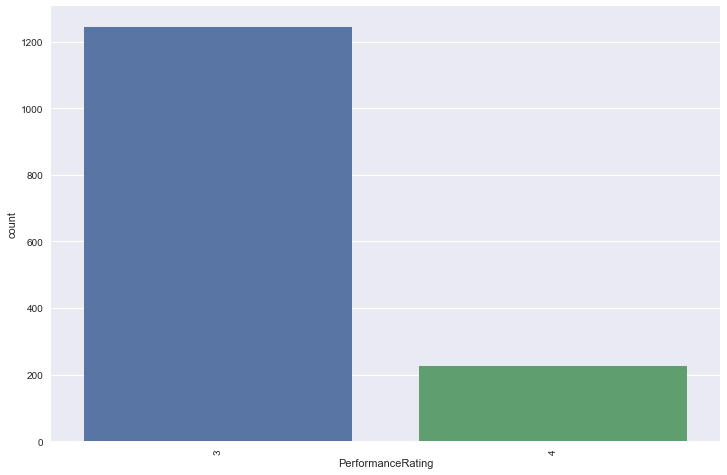

Level                     Weight
3                         1244
4                         226


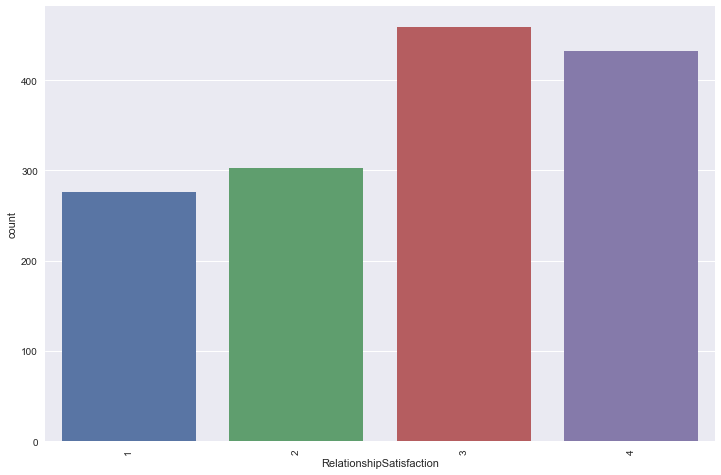

Level                     Weight
1                         276
2                         303
3                         459
4                         432


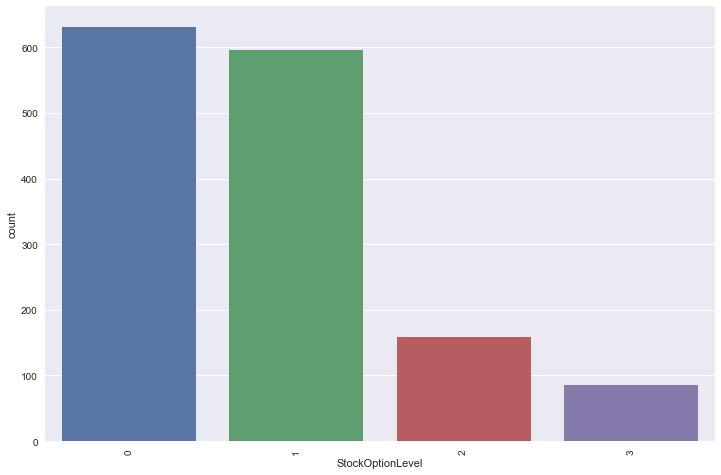

Level                     Weight
0                         631
1                         596
2                         158
3                         85


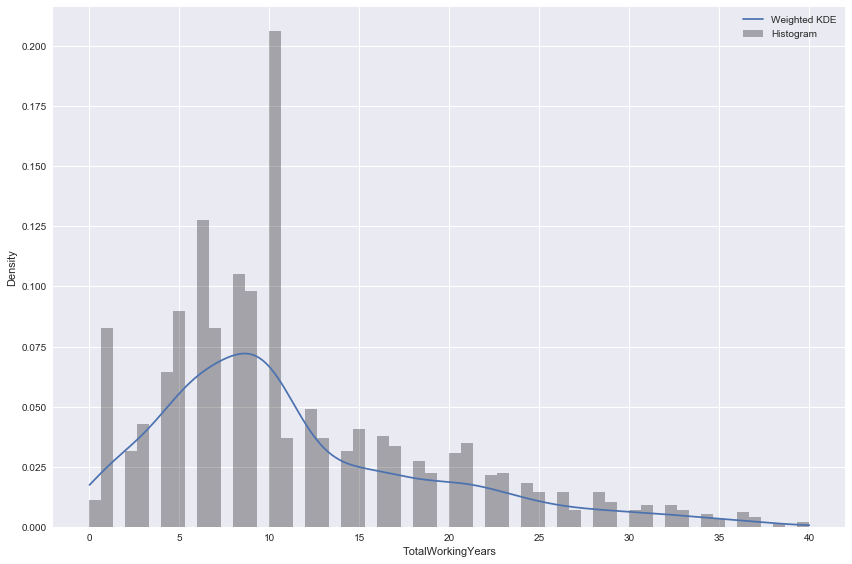

          TotalWorkingYears
Weight          1470.000000
Mean              11.279592
StdDev             7.780782
Min                0.000000
25%                6.000000
50%               10.000000
75%               15.000000
Max               40.000000
Skewness           1.117172
Kurtosis           0.918270


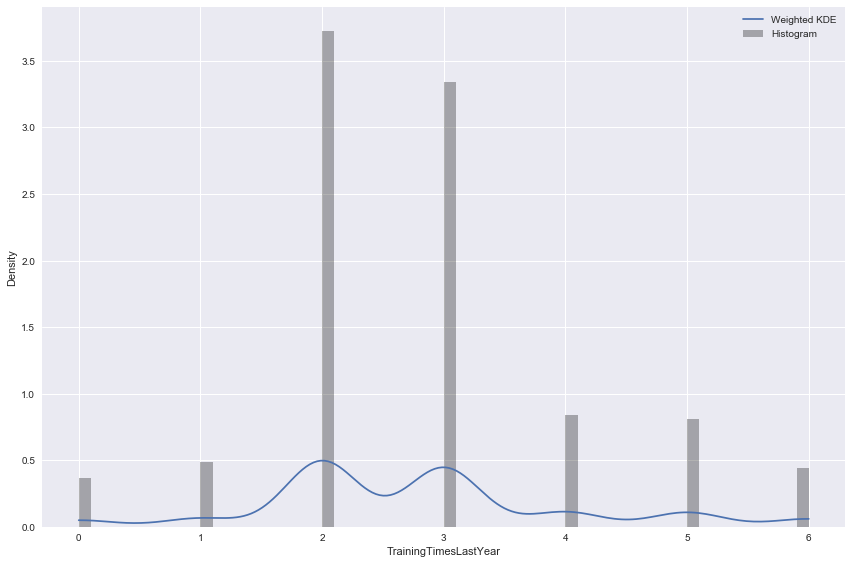

          TrainingTimesLastYear
Weight              1470.000000
Mean                   2.799320
StdDev                 1.289271
Min                    0.000000
25%                    2.000000
50%                    3.000000
75%                    3.000000
Max                    6.000000
Skewness               0.553124
Kurtosis               0.494993


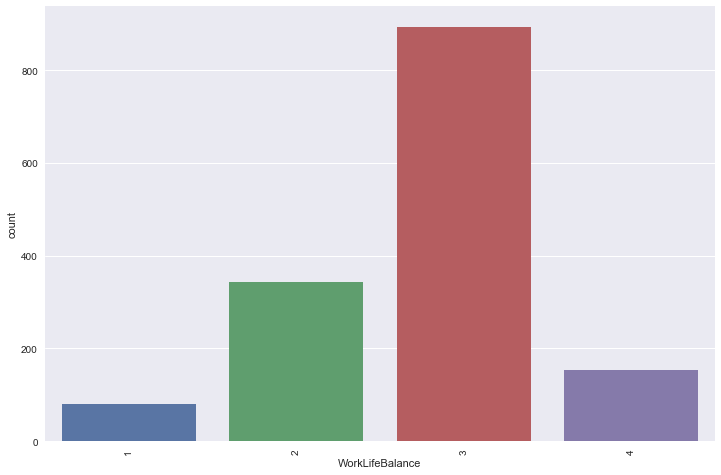

Level                     Weight
1                         80
2                         344
3                         893
4                         153


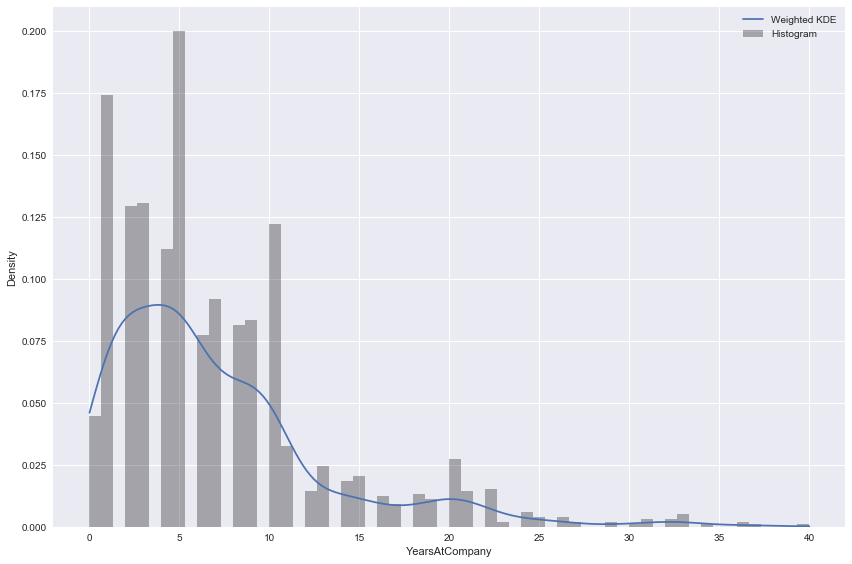

          YearsAtCompany
Weight       1470.000000
Mean            7.008163
StdDev          6.126525
Min             0.000000
25%             3.000000
50%             5.000000
75%             9.000000
Max            40.000000
Skewness        1.764529
Kurtosis        3.935509


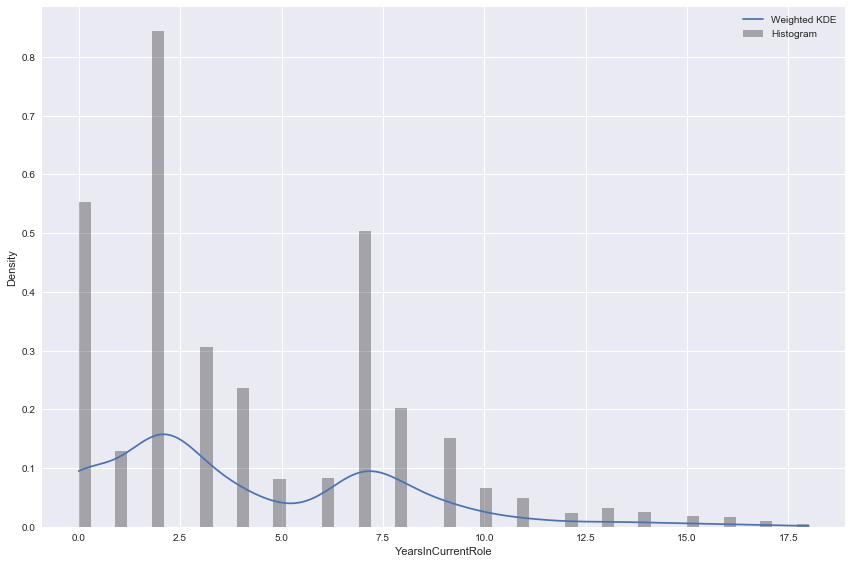

          YearsInCurrentRole
Weight           1470.000000
Mean                4.229252
StdDev              3.623137
Min                 0.000000
25%                 2.000000
50%                 3.000000
75%                 7.000000
Max                18.000000
Skewness            0.917363
Kurtosis            0.477421


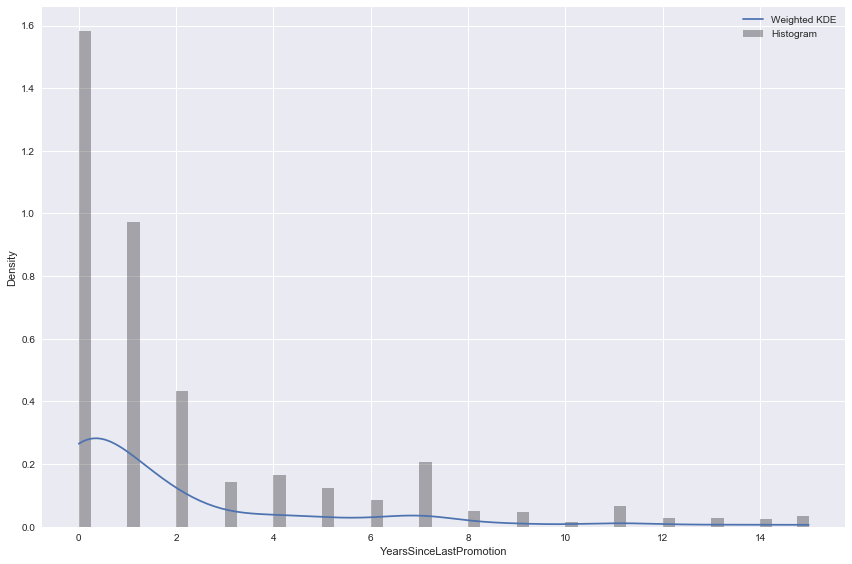

          YearsSinceLastPromotion
Weight                1470.000000
Mean                     2.187755
StdDev                   3.222430
Min                      0.000000
25%                      0.000000
50%                      1.000000
75%                      3.000000
Max                     15.000000
Skewness                 1.984290
Kurtosis                 3.612673


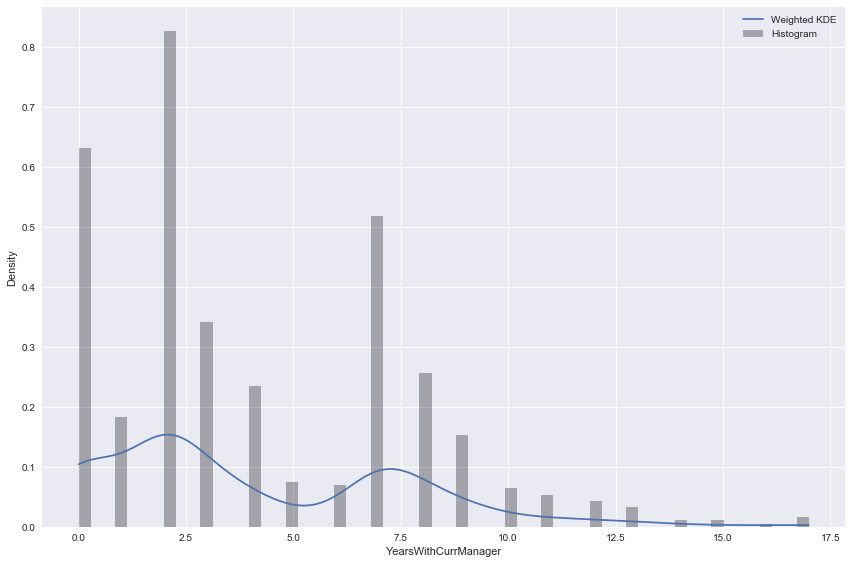

          YearsWithCurrManager
Weight             1470.000000
Mean                  4.123129
StdDev                3.568136
Min                   0.000000
25%                   2.000000
50%                   3.000000
75%                   7.000000
Max                  17.000000
Skewness              0.833451
Kurtosis              0.171058


In [5]:
#warnings.filterwarnings('ignore')

EDATools.EDA(dataset, predictors, numeric_cat_index)

<a name="part-two---predictor-correlation"></a>
# Part Two - Predictor Correlations and Clustering

In any modeling project it is important to understand correlations that exist between predictor variables. This plays a role in variable selection and can effect the speed of convergence when fitting models. Aside from the last section, correlations between continuous and categorical variables are explored separately.

<a name="correlation-between-continuous-variables"></a>
## Correlation Between Continuous Variables

The Pearson correlation is calculated for each pair of continuous variables. The scatter plot and Pearson correlation are given for each pair of variables with correlation above p_threshold (defaulted to 0.5). If you have ordinal variables or your data greatly violates the assumptions of a Pearson correlation, it may be worth adding either Kendal's $\tau$ or Spearman's $\rho$ as alternative measures of correlation. 

Pearson Correlation - Predictors
MonthlyIncome and TotalWorkingYears = 0.77
YearsAtCompany and YearsWithCurrManager = 0.77
YearsAtCompany and YearsInCurrentRole = 0.76
YearsInCurrentRole and YearsWithCurrManager = 0.71
Age and TotalWorkingYears = 0.68
TotalWorkingYears and YearsAtCompany = 0.63
YearsAtCompany and YearsSinceLastPromotion = 0.62
YearsInCurrentRole and YearsSinceLastPromotion = 0.55
MonthlyIncome and YearsAtCompany = 0.51
YearsSinceLastPromotion and YearsWithCurrManager = 0.51


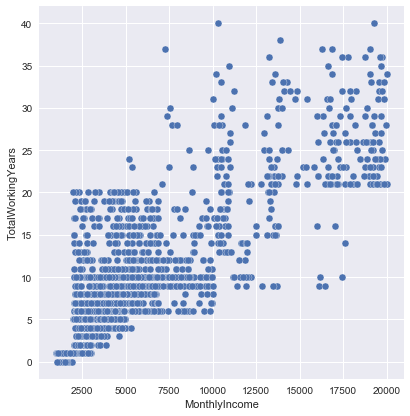

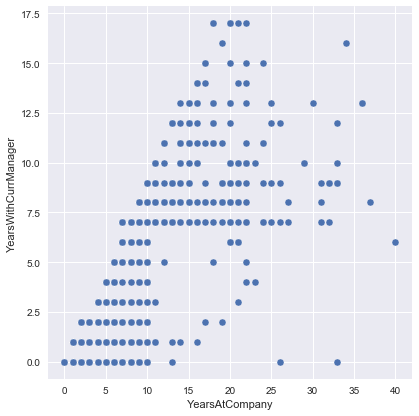

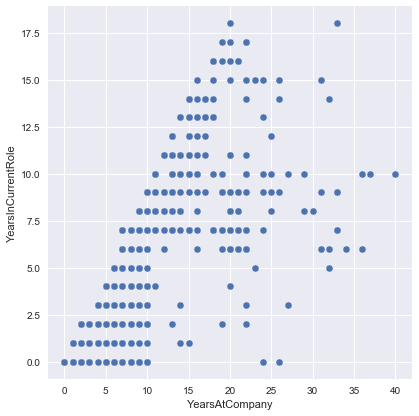

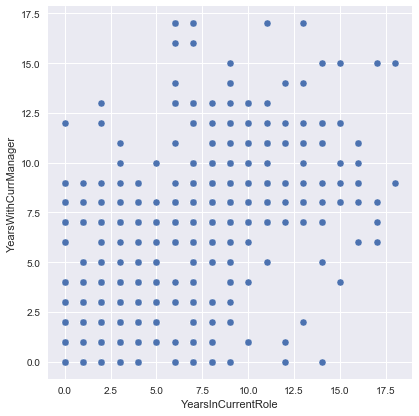

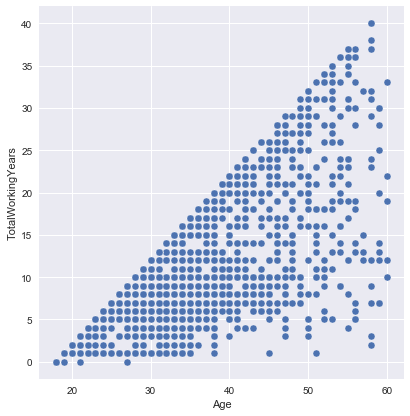

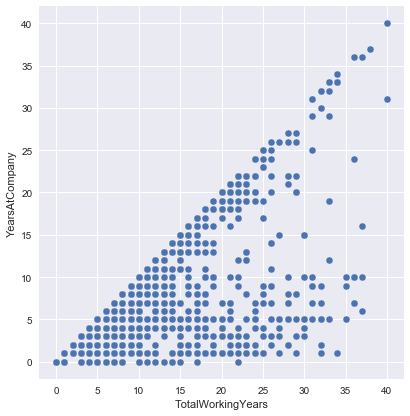

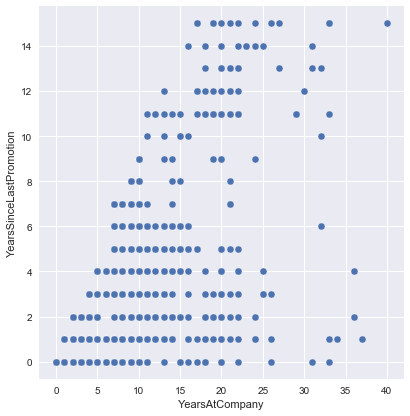

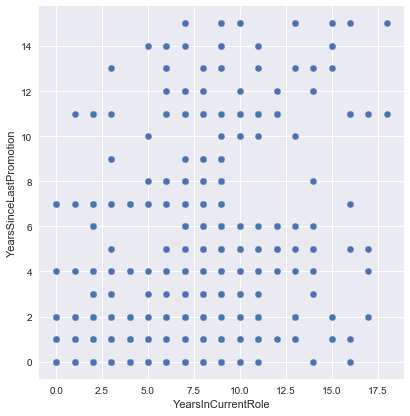

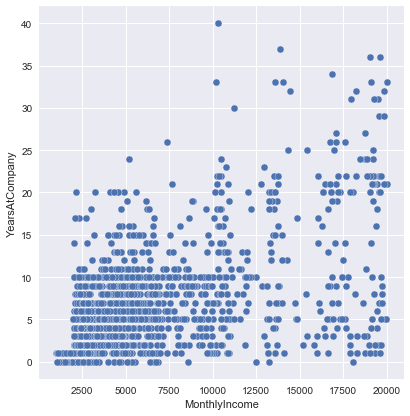

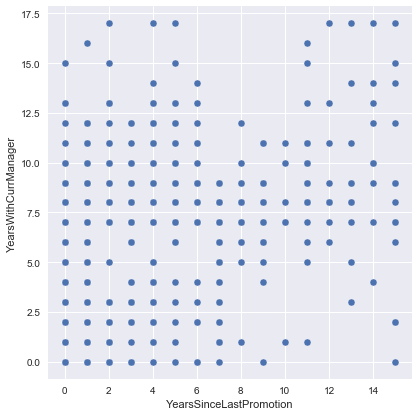

In [6]:
EDATools.Correlations_Cont(dataset, predictors, p_numeric_cat_index= numeric_cat_index)

Above we looked for pair-wise correlations, below we take a broader view and look at overall dimensionality. Principal component analysis (PCA) is a method of finding latent features (i.e. principal components) that describe a large portion of the variance among the predictor variables. Below is a graph the portion of the variance explained by each principal component on its own (top) and the cumulative variance explained by the first $n$ components (bottom). A sharp decay in the top graph implies that there is a lot of redundancy in the predictor variables and dimension reduction should be done. By default (p_normalize = True) each variable is normalized so that it has a mean of 0 and standard deviation of 1. This avoids creating a bias for the principal components to tend to variables with larger scales. It is important to note that PCA projects your features onto a *linear* subspace of the feature space. If you are interested in non-linear dimension reduction, variational autoencoders would be another option to consider.

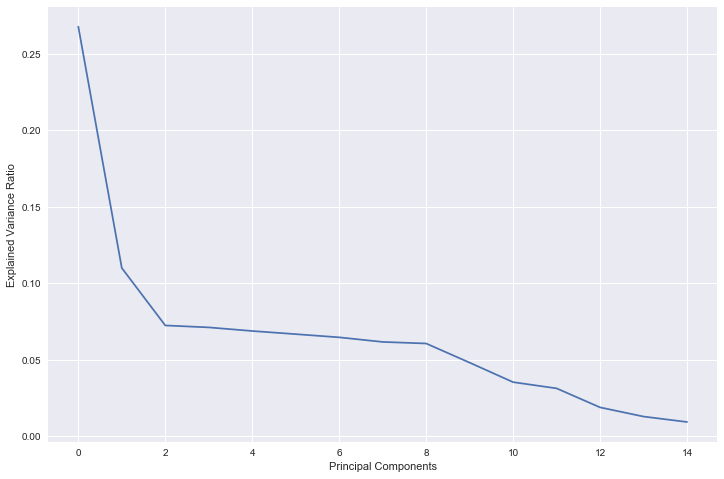

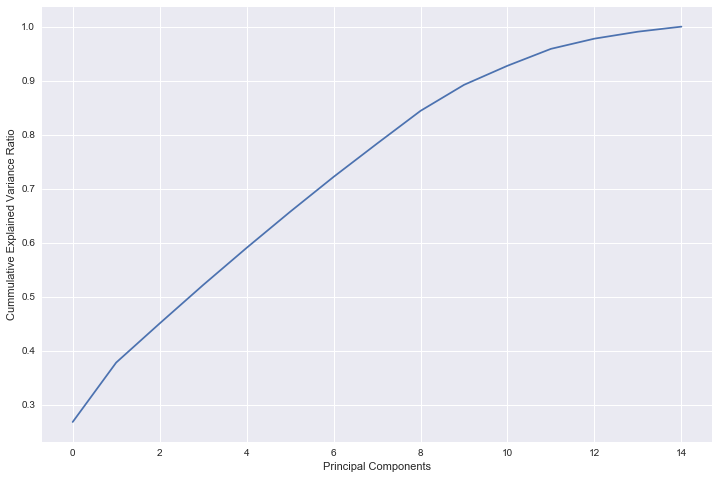

In [7]:
EDATools.PCAnalysis(dataset, predictors, numeric_cat_index)

In order to help with dimension reduction, it is often useful to know which groups of variables are correlated (also known as feature agglomeration). We will need some notion of distance on the feature space in order to find variables that are "close" together. To do this, define the following pseudometric $d$ on the feature space using Pearson correlation ($r$).

$$d(x,y) = 1 - |corr_r(x,y)|$$

A feature is then assigned to a cluster when it is within p_threshold (defaulted to 0.5) of some feature in that cluster. The dendogram will help visualize how the clusters are formed. Prior to calculating the correlation, each variable is normalized so that the mean is 0 and variance is 1. To calculate the feature clusters without normalization, set p_normalize = False.  

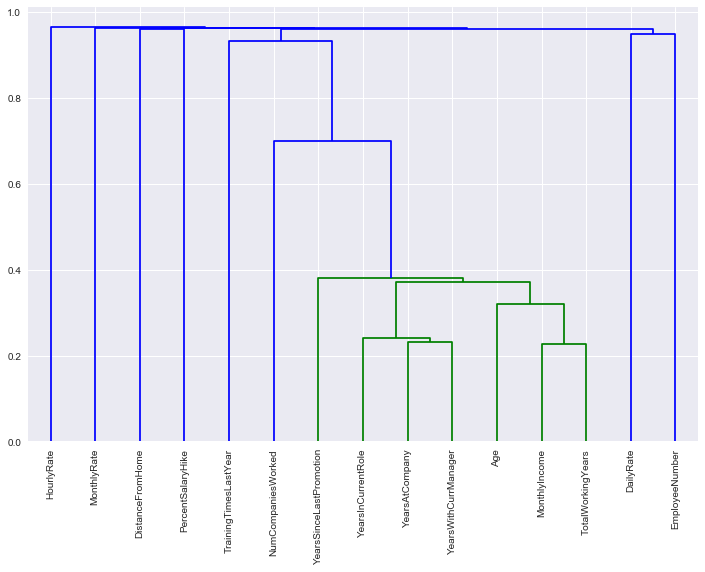

    Cluster                  Feature
2         1         DistanceFromHome
8         2        PercentSalaryHike
0         3                      Age
5         3            MonthlyIncome
9         3        TotalWorkingYears
11        3           YearsAtCompany
12        3       YearsInCurrentRole
13        3  YearsSinceLastPromotion
14        3     YearsWithCurrManager
7         4       NumCompaniesWorked
10        5    TrainingTimesLastYear
1         6                DailyRate
3         7           EmployeeNumber
6         8              MonthlyRate
4         9               HourlyRate


In [8]:
cont_clusters = EDATools.FeatureClusters2(dataset, predictors, numeric_cat_index) 

<a name="correlation-between-categorical-variables"></a>
## Correlation Between Categorical Variables

This section is very similar to above, except with categorical variables. For each pair of categorical variables, we compute the Cramer's V statistic ($\phi_c$), which provides a measure of correlation between nominal variables. Cramer's V, $\phi_c \in [0,1]$, is defined so that values close to 1 imply a higher level of correlation. A stacked bar chart and $\phi_c$ are given for each pair with correlation above p_threshold (defaulted to 0.5). The bar charts are scaled so that it shows percentage of exposure in each category; use p_scaled = "No" for unscaled charts or p_scaled = "Both" for both a scaled and unscaled chart. 

Cramer's V Correlation - Predictors
Department and JobRole = 0.94
Department and EducationField = 0.59
MaritalStatus and StockOptionLevel = 0.58
JobLevel and JobRole = 0.57


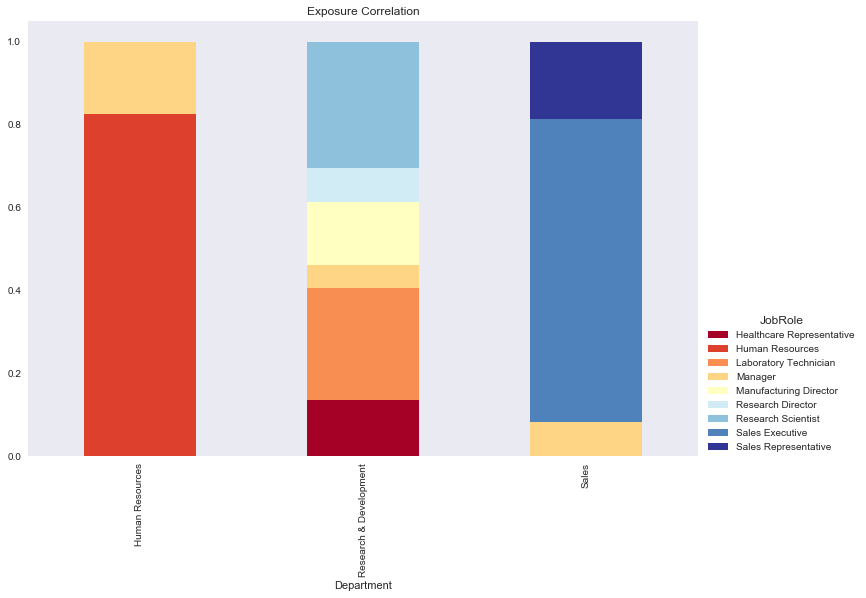

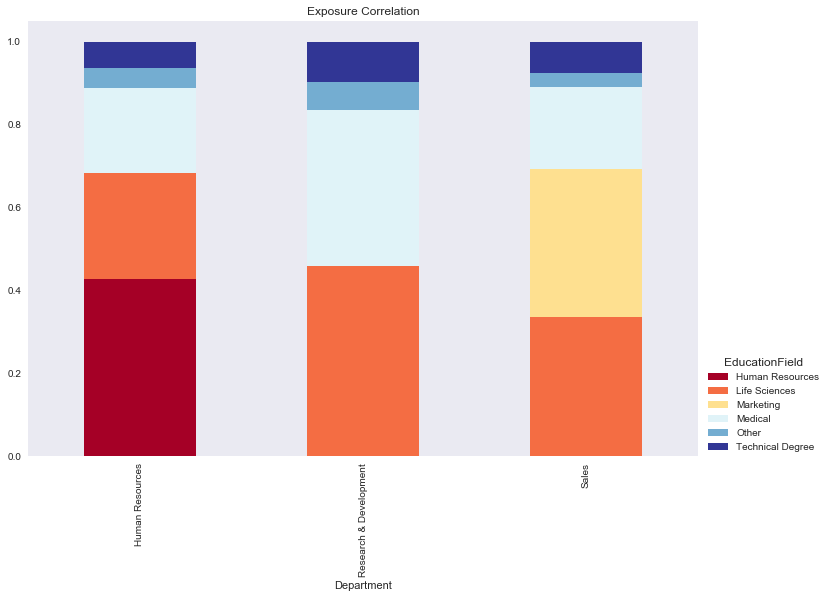

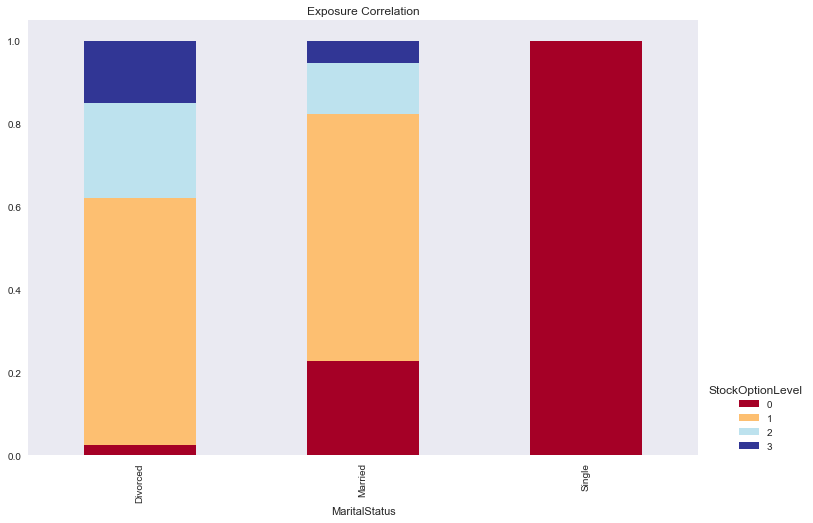

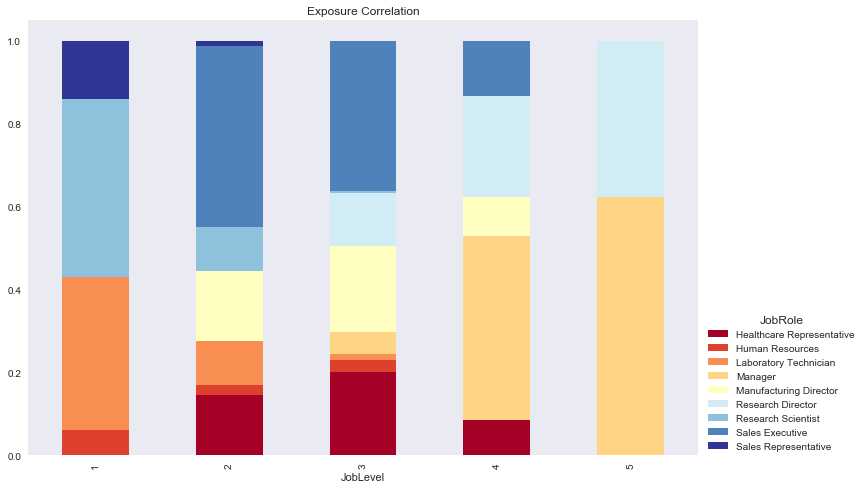

In [9]:
CVMatrix = EDATools.CramersVMatrix(dataset,predictors,numeric_cat_index)
EDATools.Correlations_Cat(dataset, predictors, numeric_cat_index, p_corr_matrix = CVMatrix) 

Similar to above, analyze the dimensionality of the categorical variables and consider dimension reduction if there is a sharp drop off in the top graph. Principal component analysis cannot be directly applied here since we are looking at categorical variables. However, we can perform a similar analysis by computing the eigenvectors and eigenvalues of Cramer's V matrix, where the $(i,j)$th component is the Cramer's V statistic of the $i$th and $j$th variable. The eigenvectors are analagous to principal components and the eigenvalues capture the portion of variance exaplained by the corresponding eigenvector.   

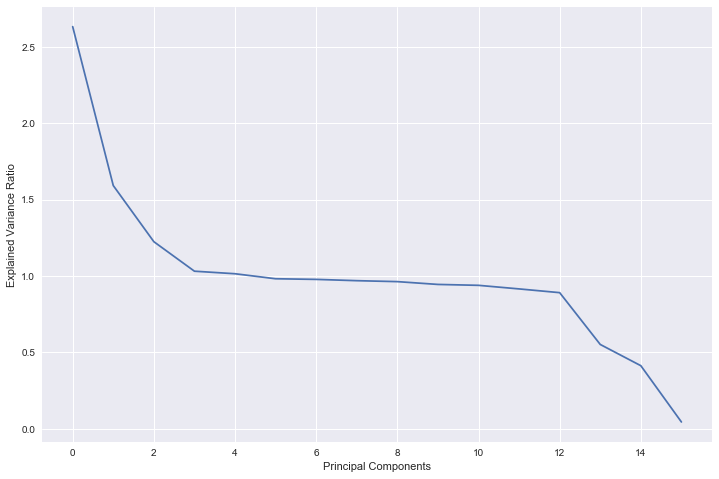

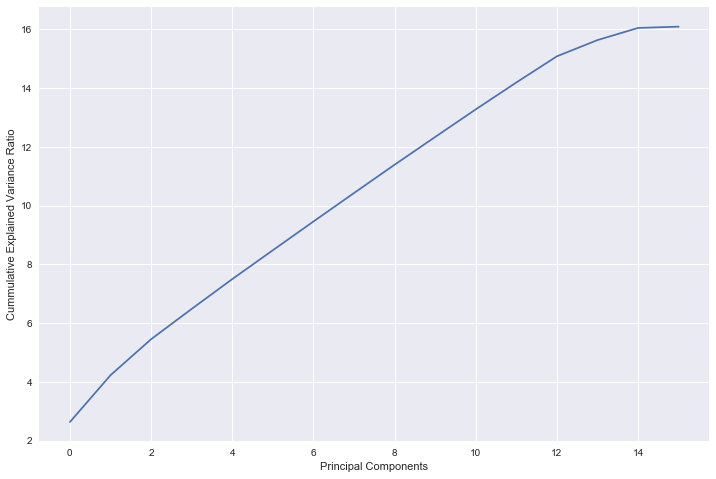

In [10]:
EDATools.PCACat(CVMatrix)

In order to cluster our categorical variables, we need a notion of distance in the categorical feature space. Using Cramer's V ($\phi_c$) in place of Pearson correlation, define a "distance" between variables $x$ and $y$.

$$d(x,y) = 1 - \phi_c(x,y)$$

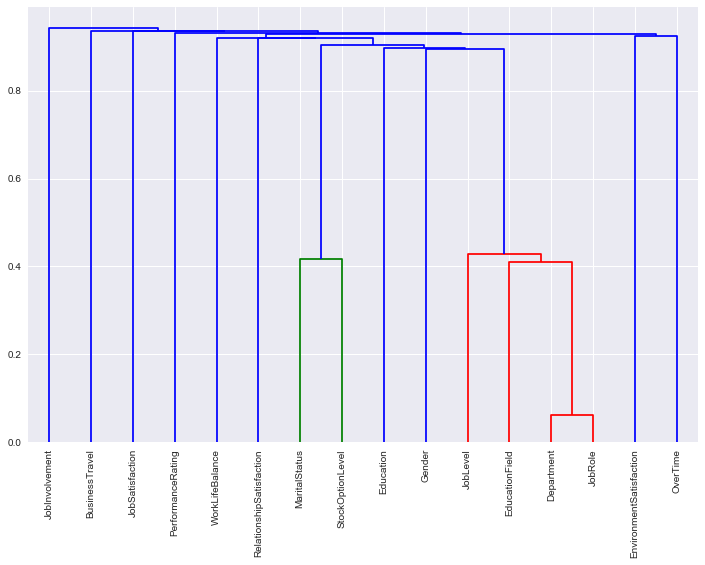

    Cluster                   Feature
10        1             MaritalStatus
14        1          StockOptionLevel
1         2                Department
3         2            EducationField
7         2                  JobLevel
8         2                   JobRole
5         3                    Gender
2         4                 Education
13        5  RelationshipSatisfaction
15        6           WorkLifeBalance
4         7   EnvironmentSatisfaction
11        8                  OverTime
12        9         PerformanceRating
9        10           JobSatisfaction
0        11            BusinessTravel
6        12            JobInvolvement


In [11]:
cat_clusters = EDATools.CatFeatureClusters(CVMatrix, predictors, dataset, numeric_cat_index)

<a name="correlation-between-continuous-and-categorical-variables"></a>
## Correlation Between Continuous and Categorical Variables

Here we want to come up with a notion of correlation (or distance in feature space) between continuous and categorical variables. A canonical definition is more challenging in this case. One method of quantifying correlation is by using a one-way ANOVA (equivalently a linear regression with one categorical predictor) and using $p$-values to quantify correlation. Here we will run a one-way ANOVA for each pair of continuous and categorical variable, and return the $p$-value for each ANOVA below p_p_val (defaulted to 0.01) along with a box-plot for each pair. ANOVA assumes that the data is normally distributed and that each category has equal variance. While ANOVA is robust to violations of these assumptions, in certain cases it might be better to use a non-parametric alternative (e.g. Kruskal-Wallis). If you come up with alternative notions of correlation, please add them to EDATools.py 

One-way ANOVA p-values - Predictors
MonthlyIncome and JobLevel = 1.5e-47
PercentSalaryHike and PerformanceRating = 1.2e-26
MonthlyIncome and JobRole = 6e-24
TotalWorkingYears and JobLevel = 2.4e-21
YearsAtCompany and JobLevel = 2.8e-12
YearsInCurrentRole and JobLevel = 7.2e-09
Age and JobLevel = 3.1e-08
TotalWorkingYears and JobRole = 2.8e-07
YearsWithCurrManager and JobLevel = 1.1e-06
YearsAtCompany and JobRole = 1.4e-05
Age and JobRole = 1.9e-05
YearsSinceLastPromotion and JobLevel = 7.6e-05
YearsInCurrentRole and JobRole = 0.00032
Age and Education = 0.00039
NumCompaniesWorked and JobLevel = 0.0013
TotalWorkingYears and Education = 0.0086


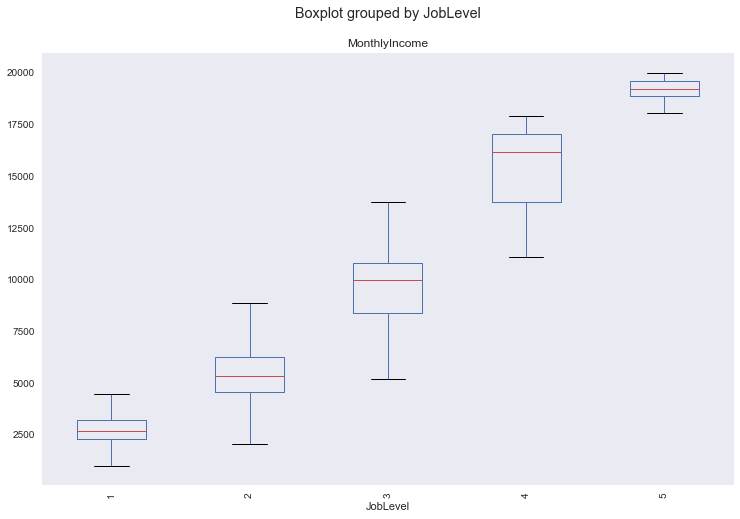

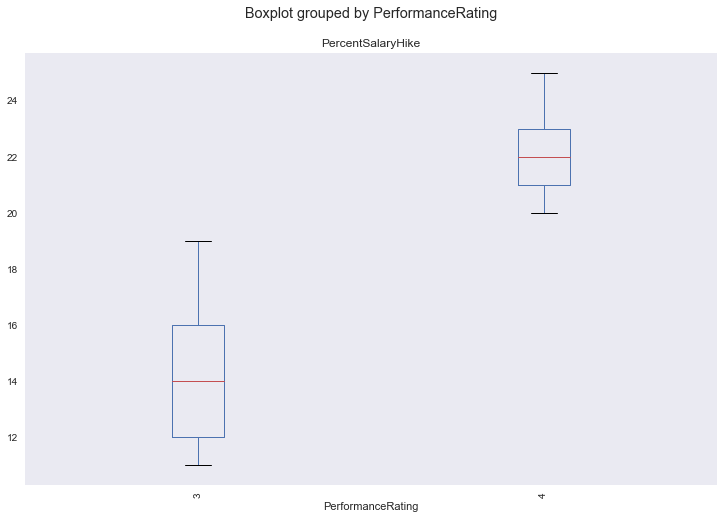

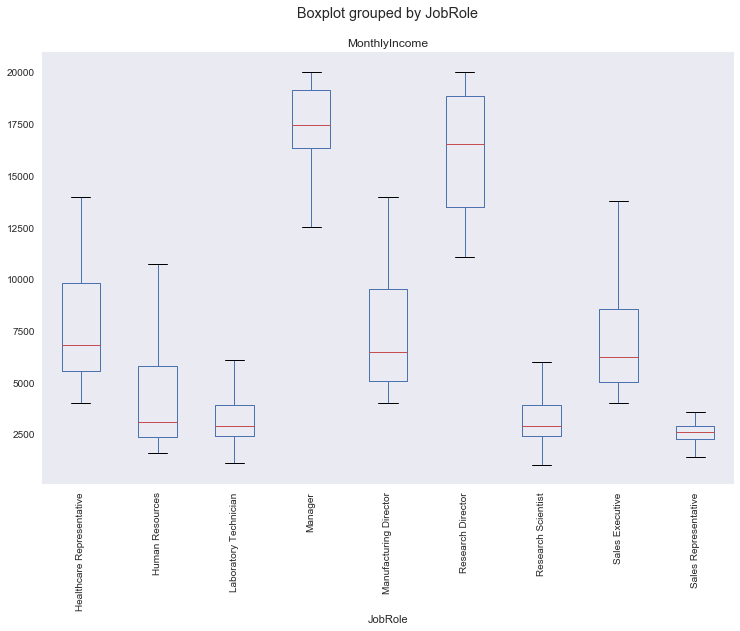

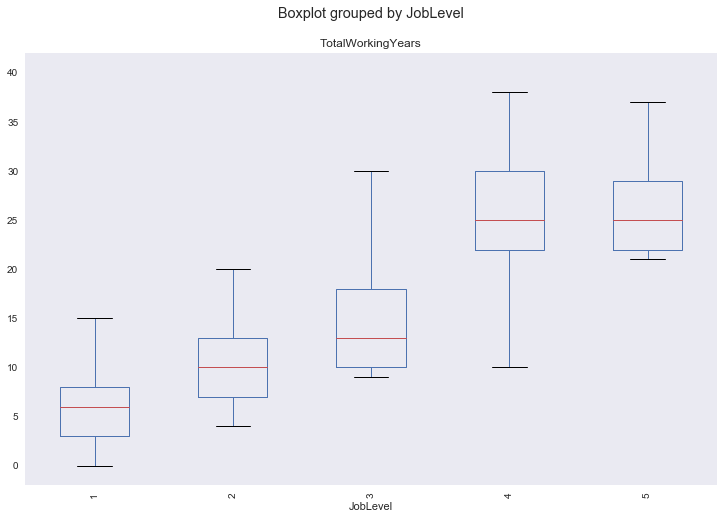

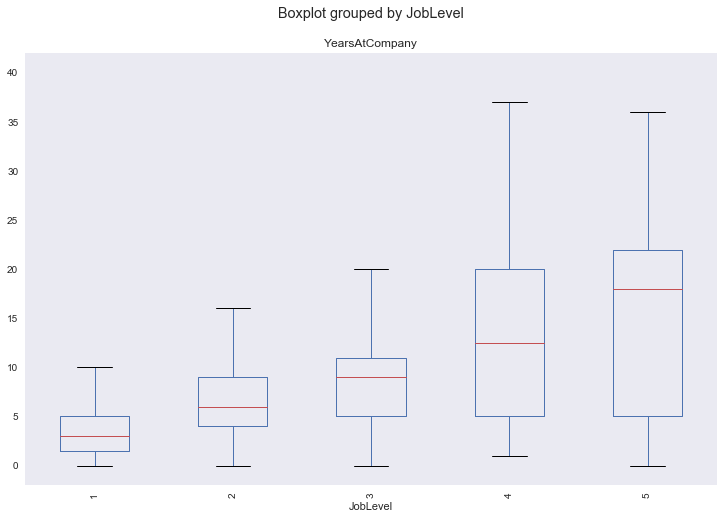

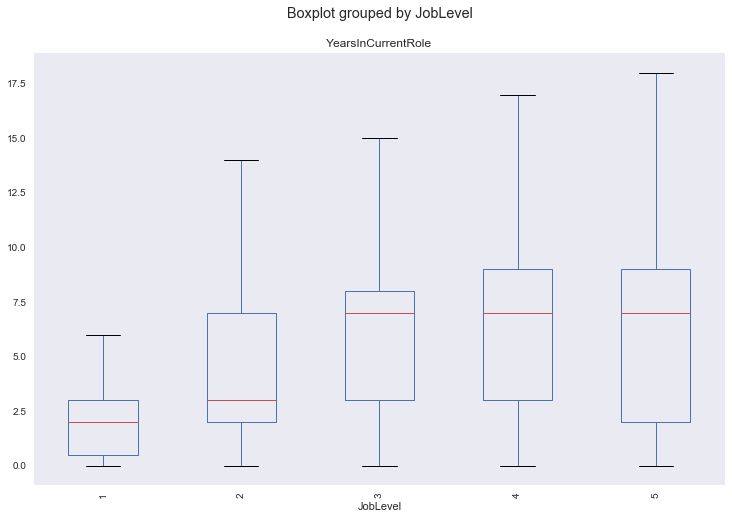

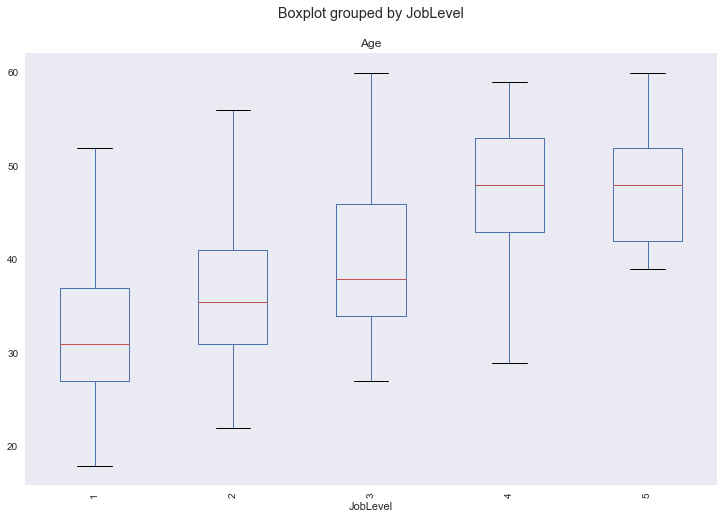

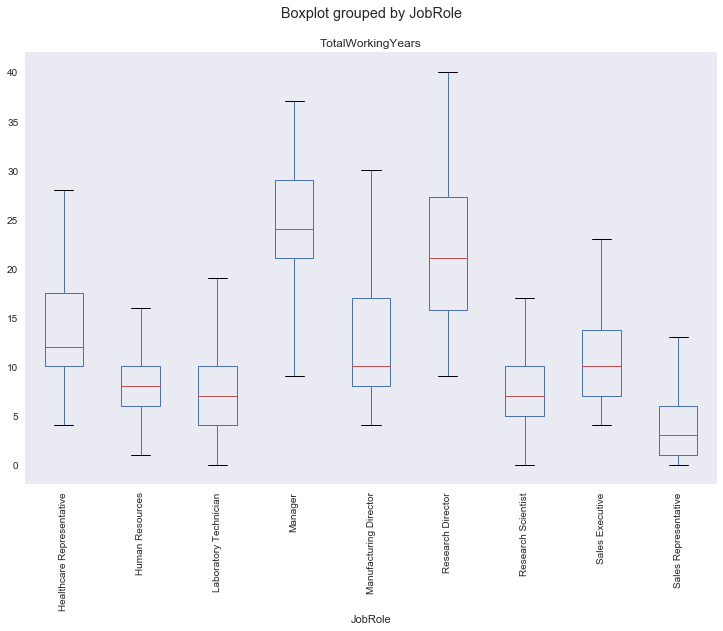

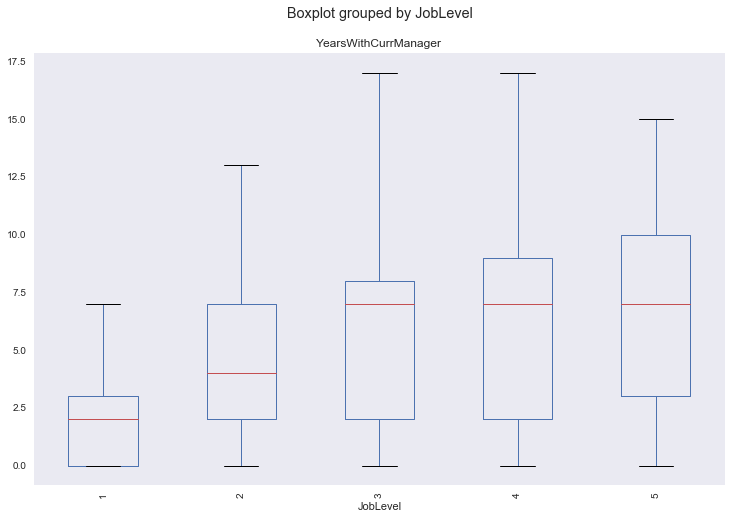

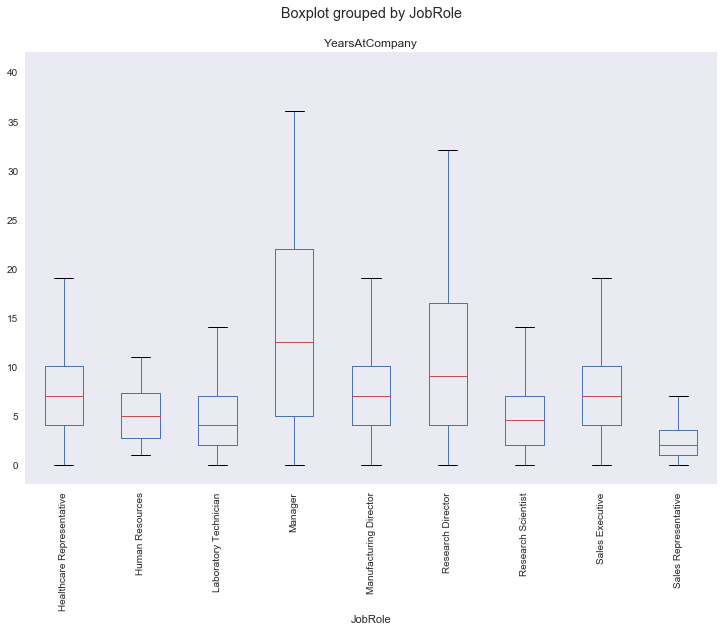

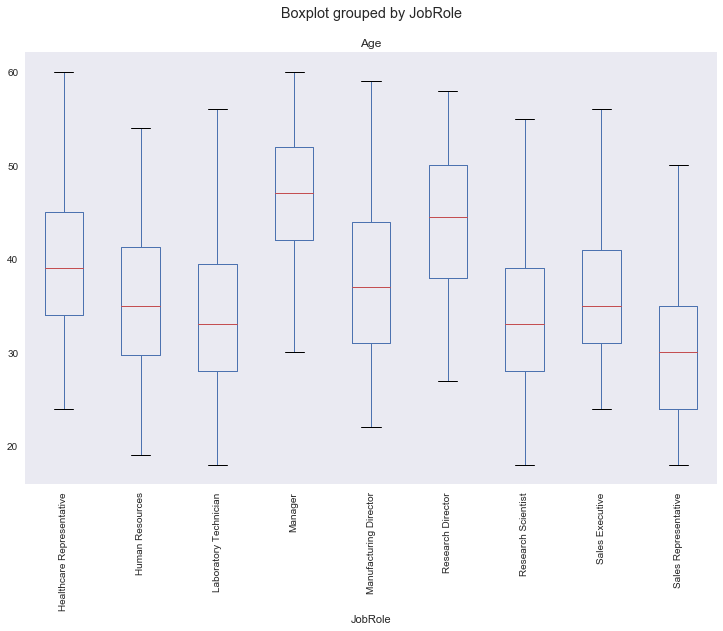

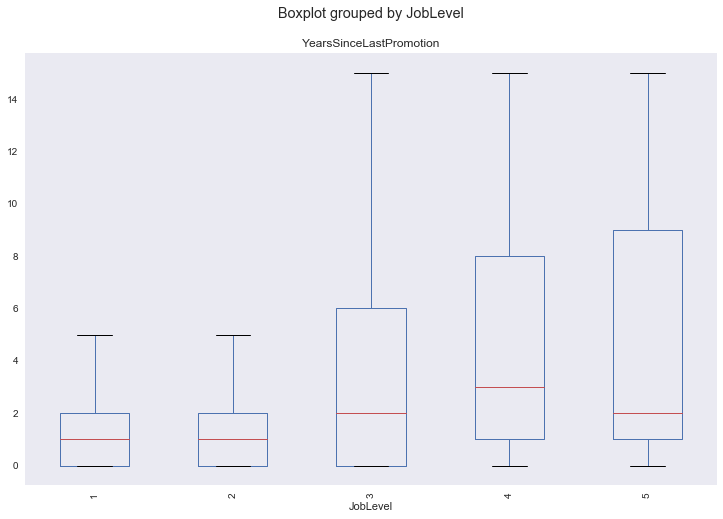

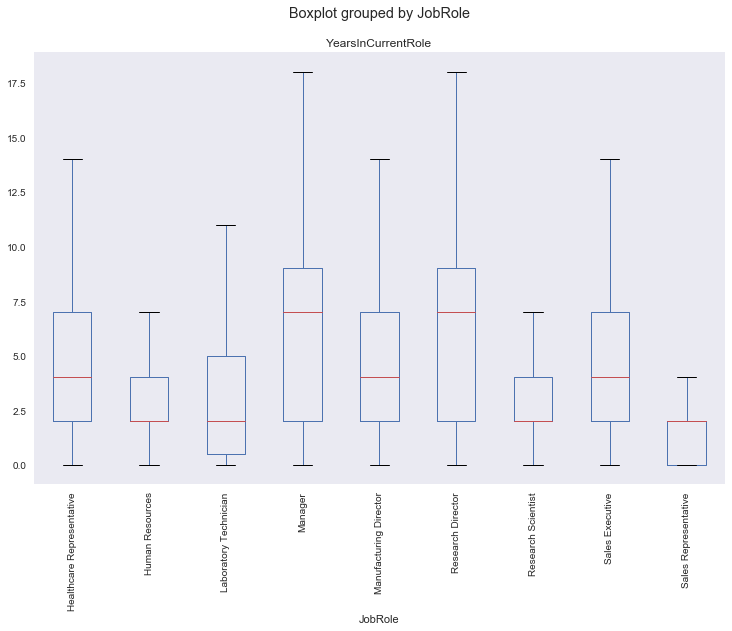

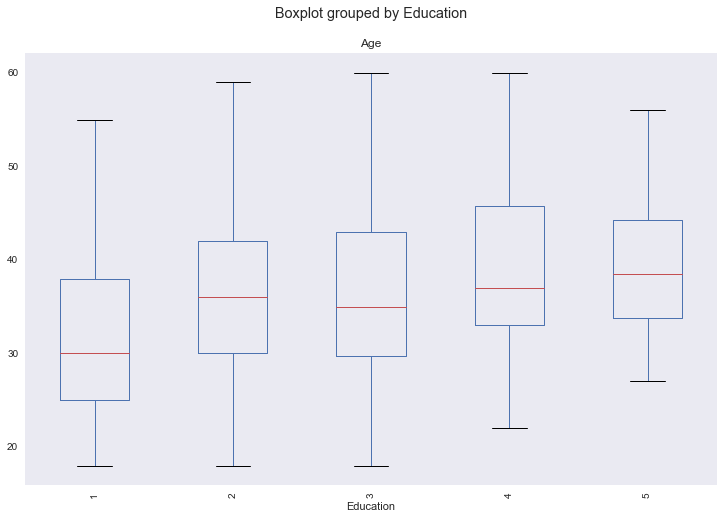

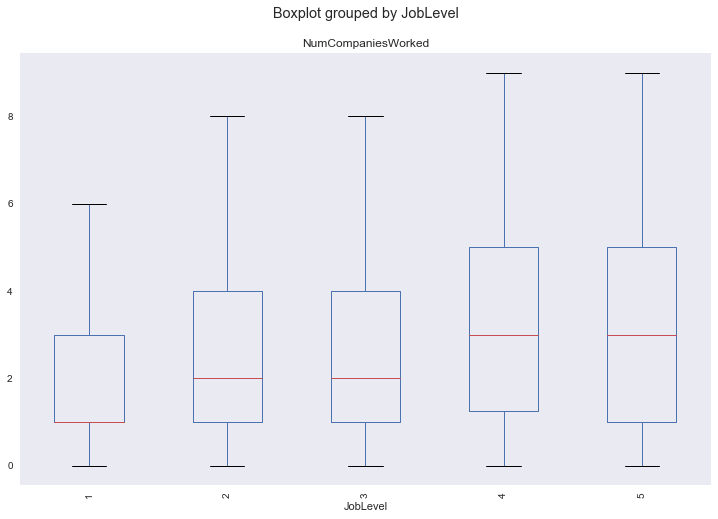

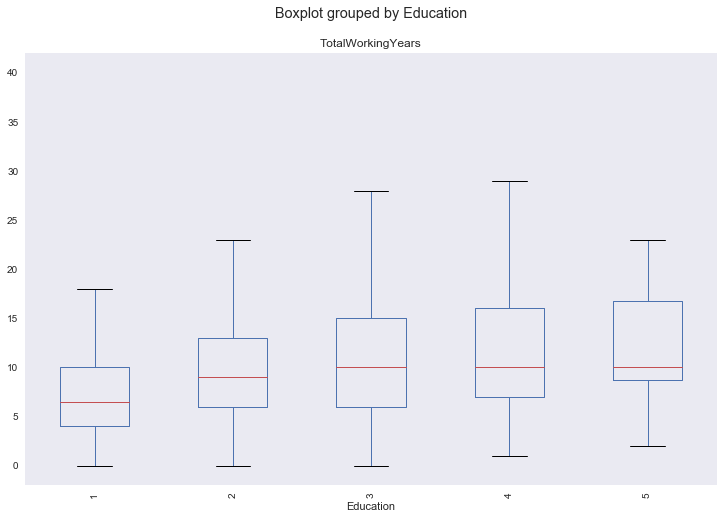

In [12]:
warnings.filterwarnings('ignore')

cont_cat_dist = EDATools.Correlations_Cont_Cat(dataset, predictors, numeric_cat_index)

Finally we would like to look for clusters of correlated variables, independent of whether they are continuous or categorical. To do that we will take the continuous clusters and categorical clusters we formed above and merge any pairs with a small $p$-value from the one-way ANOVA. In order to avoid daisy-chaining two continuous (or categorical) clusters that were not previously combined, we take the most significant (i.e. smallest $p$-value) linkages between categorical and continous clusters.

In [13]:
EDATools.ContCatFeatureClusters(cont_clusters,cat_clusters,cont_cat_dist)

Cluster 1: ['DistanceFromHome']
Cluster 2: ['PercentSalaryHike', 'PerformanceRating']
Cluster 3: ['TotalWorkingYears', 'YearsAtCompany', 'JobRole', 'YearsInCurrentRole', 'JobLevel', 'Age', 'Department', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EducationField', 'MonthlyIncome']
Cluster 4: ['NumCompaniesWorked']
Cluster 5: ['TrainingTimesLastYear']
Cluster 6: ['DailyRate']
Cluster 7: ['EmployeeNumber']
Cluster 8: ['MonthlyRate']
Cluster 9: ['HourlyRate']
Cluster 10: ['MaritalStatus', 'StockOptionLevel']
Cluster 11: ['Gender']
Cluster 12: ['Education']
Cluster 13: ['RelationshipSatisfaction']
Cluster 14: ['WorkLifeBalance']
Cluster 15: ['EnvironmentSatisfaction']
Cluster 16: ['OverTime']
Cluster 17: ['JobSatisfaction']
Cluster 18: ['BusinessTravel']
Cluster 19: ['JobInvolvement']
